#### 독립변수 : 특성을 자유롭게 조합해 가면서 검증해보기
- 특성 자유롭게 조합, 적용 하면서 정확도 차이 확인
- 전체 특성도 모두 적용해보기
- 사용한 모델별로, 예측을 통한 결과를 데이터프레임에 col_predict 컬럼명으로 추가

In [1]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측(자유롭게)

# 특성 이름을 담고 있는 key 값 = feature_names
# 특성 데이터를 담고 있는 key 값 = data
# 범주 와인의 종류를 담고 있는 key 값 = target_names
# - 범주는 'class_0'과 'class_1'만 사용(0과 1로 변경하여 사용)
# - 0 = 레드와인, 1 = 화이트와인

# 알콜(alcohol)
# 말산(Malic acid)
# 회분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intens)
# 색상(Color)
# 희석 와인의 00280/00315 비율 (00280/00315 of diluted wines)
# 프롤린(Proline)

##### 전처리

In [2]:
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [3]:
wine_data = wine_all['data']
wine_target = wine_all['target']
wine_target_names = wine_all['target_names']
wine_feature_names = wine_all['feature_names']

In [4]:
import pandas as pd

wine_data_df = pd.DataFrame(wine_data)
wine_target_df = pd.DataFrame(wine_target)
wine_target_names = list(wine_target_names)
wine_feature_names =list(wine_feature_names)

In [5]:
wine_data_df.columns = [wine_feature_names]
wine_data = wine_data_df.to_numpy()
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine_target_df.iloc[:59] = 'class_0'
wine_target_df.iloc[59:130] ='class_1'
wine_target_df.iloc[130:] ='class_2'
print(wine_target_df.value_counts())

class_1    71
class_0    59
class_2    48
dtype: int64


In [7]:
wine_target = wine_target_df.to_numpy()
wine_target

array([['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(wine_data,
                                                                      wine_target,
                                                                      random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[1.29728571e+01 2.38684211e+00 2.36218045e+00 1.94338346e+01
 1.00759398e+02 2.27706767e+00 2.02120301e+00 3.63533835e-01
 1.60864662e+00 5.01759398e+00 9.59443609e-01 2.61000000e+00
 7.42992481e+02] [8.26867057e-01 1.09476565e+00 2.79549418e-01 3.45425285e+00
 1.49430751e+01 6.43264445e-01 1.00174963e+00 1.26444707e-01
 5.74790949e-01 2.19422007e+00 2.33661197e-01 7.27211173e-01
 3.05711779e+02]


##### 의사결정나무

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.9333333333333333


In [15]:
wine_feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

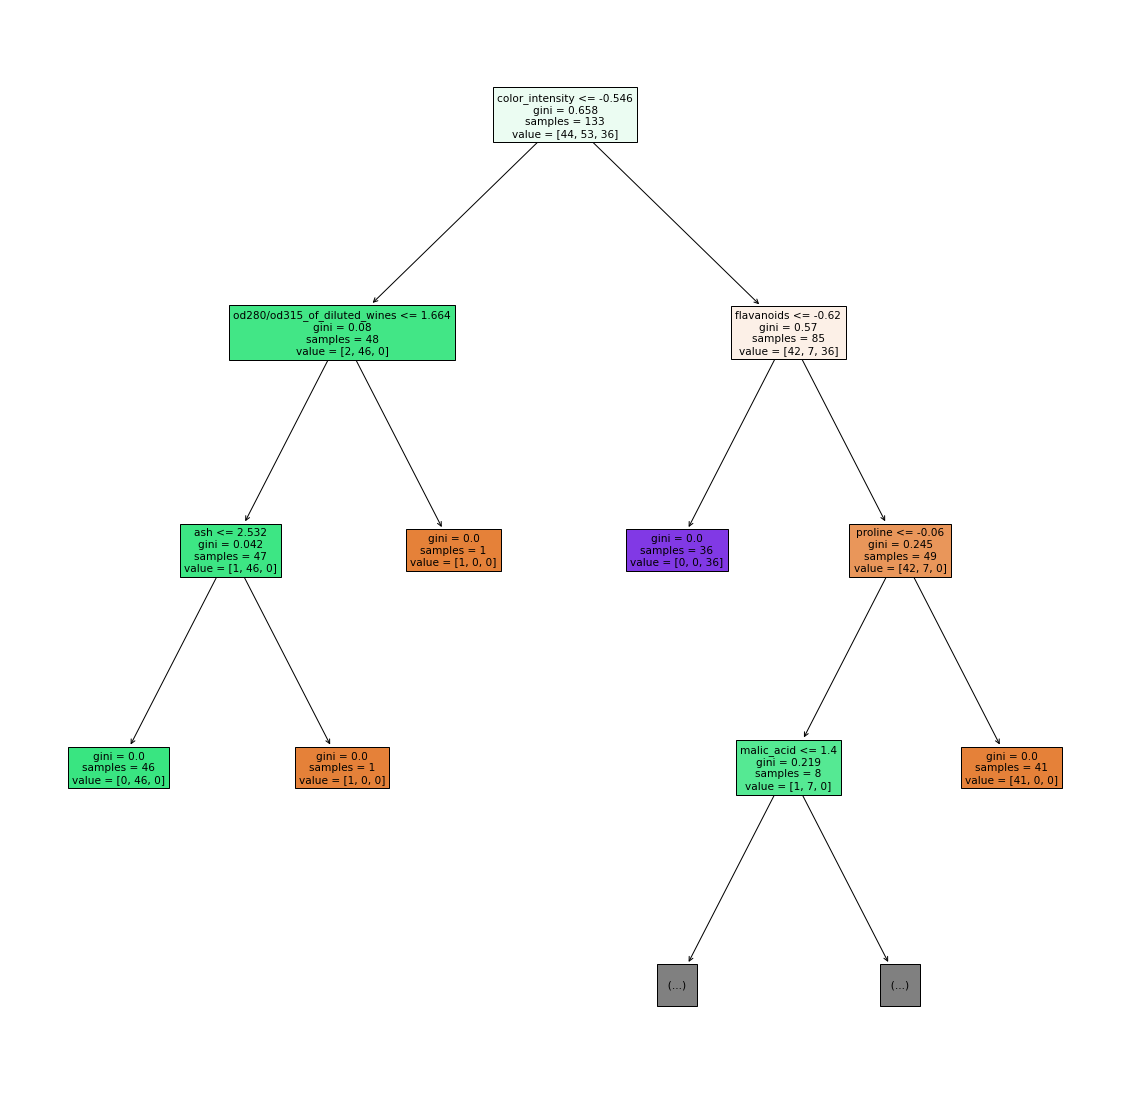

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt,
          max_depth=3, # 트리의 깊이(첫번째 제외)
          filled=True, # 독립변수별로 색으로 구분
          feature_names=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']) # 사용된 독립변수 이름
plt.show()

In [19]:
print(dt.feature_importances_)
print(wine_feature_names)

[0.         0.01998197 0.02235065 0.         0.         0.
 0.41589367 0.         0.         0.40331707 0.         0.02141938
 0.11703726]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [20]:
predict_data = wine_data_df[['alcohol','ash','flavanoids','color_intensity','proline']]
predict_data

,alcohol,ash,flavanoids,color_intensity,proline
0,14.23,2.43,3.06,5.64,1065.0
1,13.20,2.14,2.76,4.38,1050.0
2,13.16,2.67,3.24,5.68,1185.0
3,14.37,2.50,3.49,7.80,1480.0
4,13.24,2.87,2.69,4.32,735.0
...,...,...,...,...,...
173,13.71,2.45,0.61,7.70,740.0
174,13.40,2.48,0.75,7.30,750.0
175,13.27,2.26,0.69,10.20,835.0
176,13.17,2.37,0.68,9.30,840.0


In [21]:
print(len(predict_data))
print(len(train_target))

178
133


In [22]:
train_input, test_input, train_target, test_target = train_test_split(predict_data,
                                                                      wine_target,
                                                                      random_state=42)

In [23]:
ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[ 12.97285714   2.36218045   2.02120301   5.01759398 742.9924812 ] [8.26867057e-01 2.79549418e-01 1.00174963e+00 2.19422007e+00
 3.05711779e+02]


In [24]:
dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))



1.0
0.9555555555555556


In [25]:
dt.predict(predict_data)

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 

##### 확률적 경사하강법

In [26]:
train_input, test_input, train_target, test_target = train_test_split(wine_data,
                                                                      wine_target,
                                                                      random_state=42)

In [27]:
ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[1.29728571e+01 2.38684211e+00 2.36218045e+00 1.94338346e+01
 1.00759398e+02 2.27706767e+00 2.02120301e+00 3.63533835e-01
 1.60864662e+00 5.01759398e+00 9.59443609e-01 2.61000000e+00
 7.42992481e+02] [8.26867057e-01 1.09476565e+00 2.79549418e-01 3.45425285e+00
 1.49430751e+01 6.43264445e-01 1.00174963e+00 1.26444707e-01
 5.74790949e-01 2.19422007e+00 2.33661197e-01 7.27211173e-01
 3.05711779e+02]


In [28]:
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9777777777777777


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9777777777777777


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [31]:
print("훈련 정확도 리스트 갯수 = ", len(train_score))
print("테스트 정확도 리스트 갯수 = ", len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


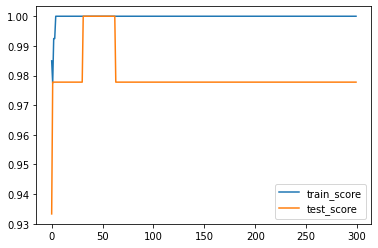

In [32]:
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [33]:
sc = SGDClassifier(loss="log", max_iter=40, tol=None, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
1.0


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data_df[['alcohol','ash','flavanoids','color_intensity','proline']]
predict_data

,alcohol,ash,flavanoids,color_intensity,proline
0,14.23,2.43,3.06,5.64,1065.0
1,13.20,2.14,2.76,4.38,1050.0
2,13.16,2.67,3.24,5.68,1185.0
3,14.37,2.50,3.49,7.80,1480.0
4,13.24,2.87,2.69,4.32,735.0
...,...,...,...,...,...
173,13.71,2.45,0.61,7.70,740.0
174,13.40,2.48,0.75,7.30,750.0
175,13.27,2.26,0.69,10.20,835.0
176,13.17,2.37,0.68,9.30,840.0


In [35]:
predict_data = wine_data_df.to_numpy()
predict_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [36]:
predict_scaled = ss.transform(predict_data)
predict_scaled

array([[ 1.52036878, -0.61825296,  0.24260308, ...,  0.34475725,
         1.80140247,  1.05330426],
       [ 0.274703  , -0.55431234, -0.79478059, ...,  0.38755425,
         1.08634194,  1.00423844],
       [ 0.22632762, -0.02451859,  1.10112749, ...,  0.30196024,
         0.77006518,  1.44583084],
       ...,
       [ 0.35935989,  1.72928141, -0.36551838, ..., -1.58110809,
        -1.44387221,  0.30096164],
       [ 0.23842147,  0.18557204,  0.02797197, ..., -1.53831108,
        -1.36136522,  0.31731692],
       [ 1.39943035,  1.56486266,  1.35153044, ..., -1.49551407,
        -1.38886755, -0.59857845]])

In [37]:
result_predict = sc.predict(predict_scaled)
print(result_predict)
wine_pred = wine_data_df
wine_pred["class"] = wine_target_df
wine_pred["class_pred"] = result_predict
wine_pred

['class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'clas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2,class_2


In [38]:
o_cnt = len(wine_pred[(wine_pred["class"] == wine_pred["class_pred"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["class"] != wine_pred["class_pred"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

ValueError: Can only compare identically-labeled DataFrame objects

In [ ]:
### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 100.0% 중 정답률[100.0%], 오답률[0.0%]
